**Topic Modelling** in NLP is an technique used to uncover the topics present in a document or collection of document.

**Link to dataset :** http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Musical_Instruments_5.json.gz

**Problem statment:** Today we will be tackling a very comman type of EDA/insight discovery problems, where you've have been given a lot of text, and you just have to figure out what is being talked about.

In [1]:
# Reading the dataset using pandas
import numpy as np
import pandas as pd

data = pd.read_json('Musical_Instruments_5.json', lines=True)
data.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"


In [2]:
# The date format looks weired, so converting the correct format using pandas
data['reviewTime'] = pd.to_datetime(data['reviewTime'], format='%m %d, %Y')
data.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,2014-02-28


<Axes: >

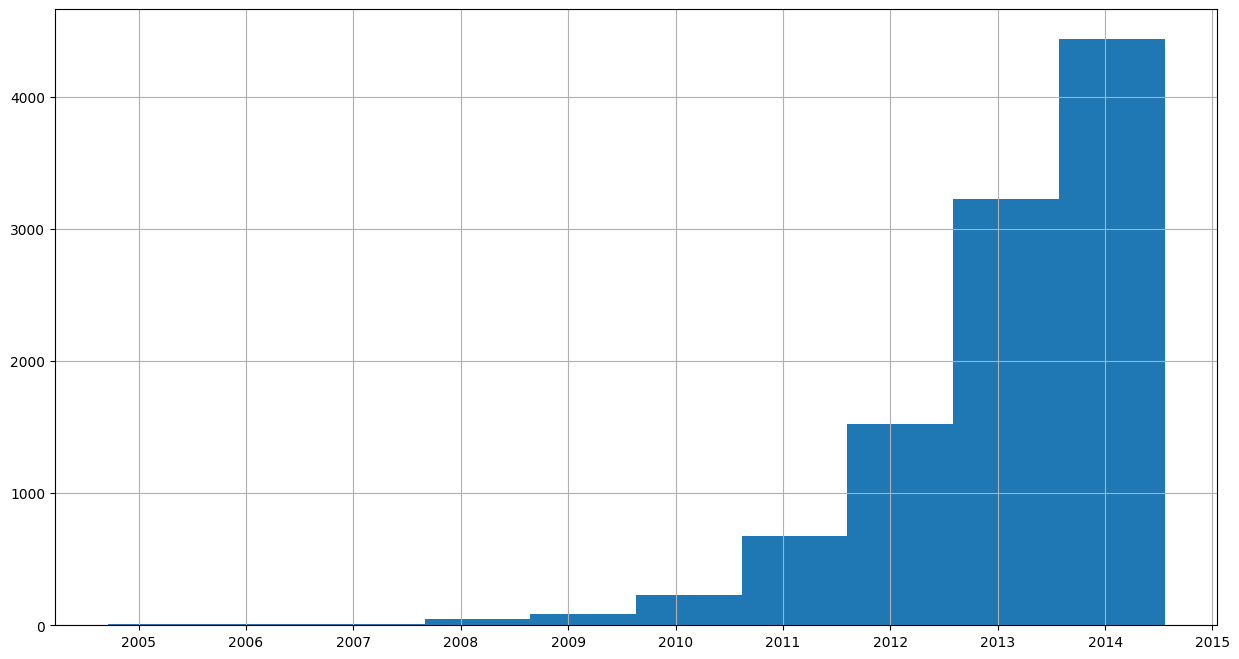

In [3]:
#looks like the reviews from 2005 to 2014
data['reviewTime'].hist(figsize=(15,8))

<Axes: >

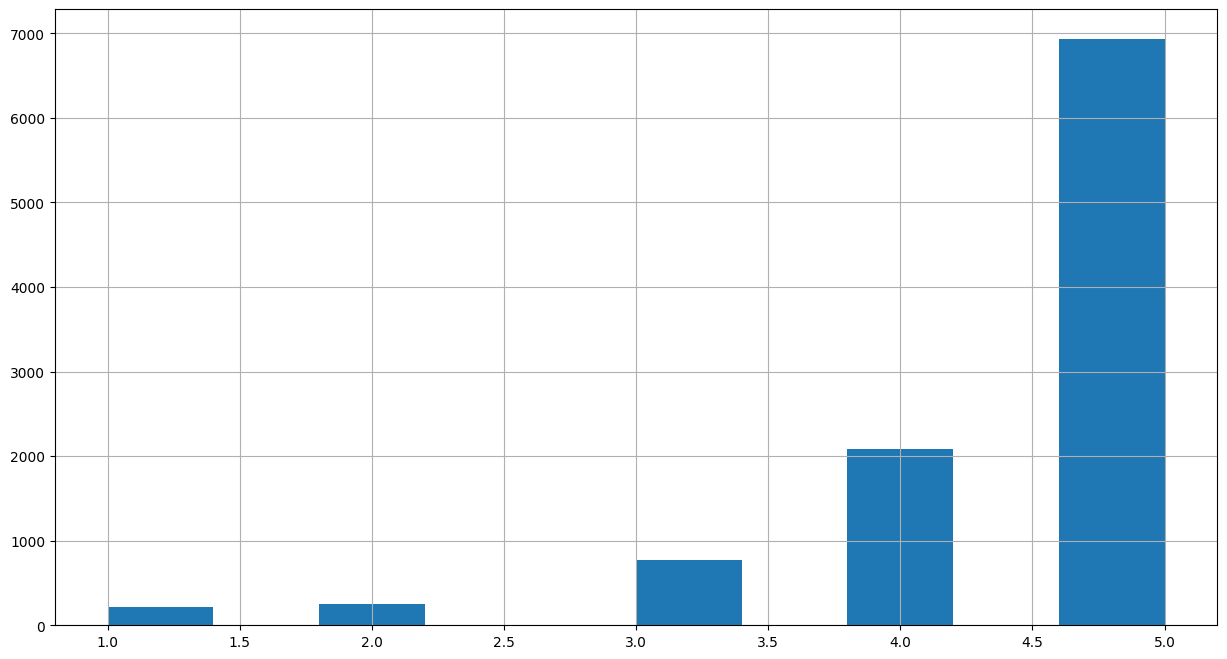

In [4]:
#count of ratings
data['overall'].hist(figsize=(15, 8))

**One Solution:** What if we just count words
And see the top 10 words

In [5]:
from collections import Counter

def flatten(list_of_lists):
  flat_list = []
  for sublist in list_of_lists:
    flat_list.extend(sublist)
  return flat_list


In [6]:
# Download nltk

!pip install nltk
!pip install wordclod
import nltk
nltk.download('all')

ERROR: Could not find a version that satisfies the requirement wordclod (from versions: none)
ERROR: No matching distribution found for wordclod


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

def word_cloud(counter_all):
  w = WordCloud().generate_from_frequencies(frequencies=dict(counter_all))
  plt.imshow(w)

def tokenize(text):
  tokens = [w for w in word_tokenize(text.lower())]
  return tokens

In [8]:
counter_all = Counter(flatten(data['reviewText'].apply(tokenize).tolist()))
counter_all.most_common(10)

[('.', 47091),
 ('the', 44092),
 (',', 35705),
 ('i', 30997),
 ('a', 27895),
 ('and', 26984),
 ('it', 24119),
 ('to', 23038),
 ('is', 14943),
 ('of', 13588)]

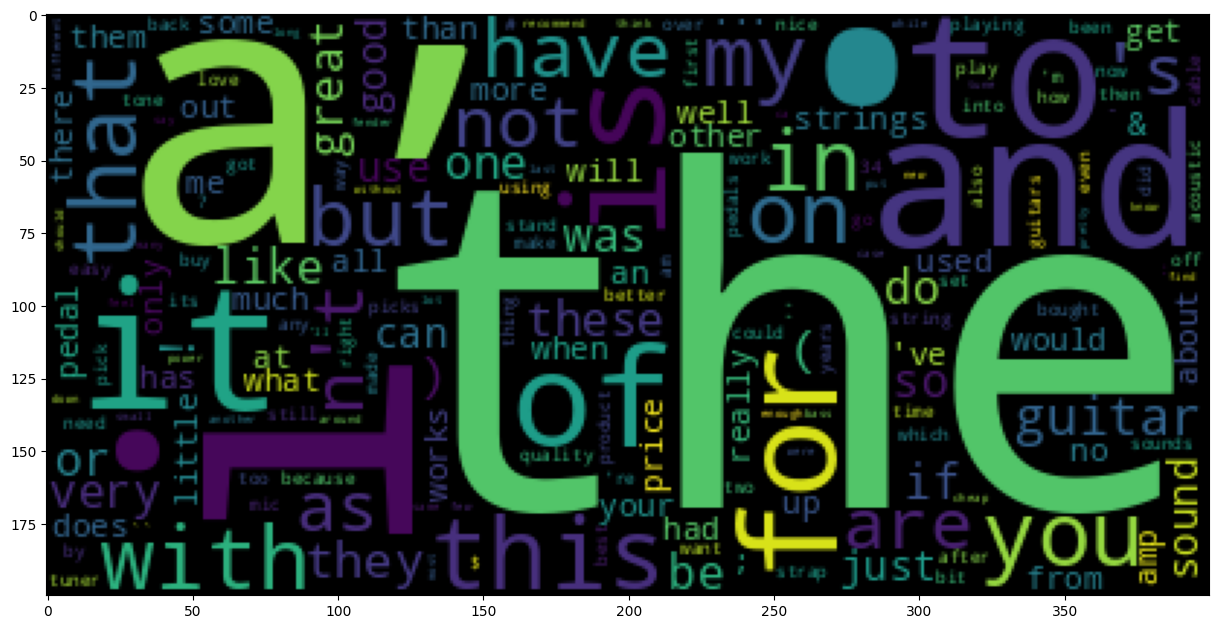

In [9]:
plt.figure(figsize=(15, 8))
word_cloud(counter_all)

What if we remove stopwords and punctuations?

In [10]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(text):
  tokens = [w for w in word_tokenize(text.lower()) if w not in STOP_WORDS and w not in string.punctuation]
  return tokens

counter_all = Counter(flatten(data['reviewText'].apply(remove_stopwords).to_list()))
counter_all.most_common(10)

[('guitar', 5472),
 ('great', 4026),
 ('like', 3897),
 ('use', 3724),
 ('good', 3720),
 ('sound', 3507),
 ('strings', 3349),
 ('pedal', 2519),
 ('price', 2156),
 ('little', 2050)]

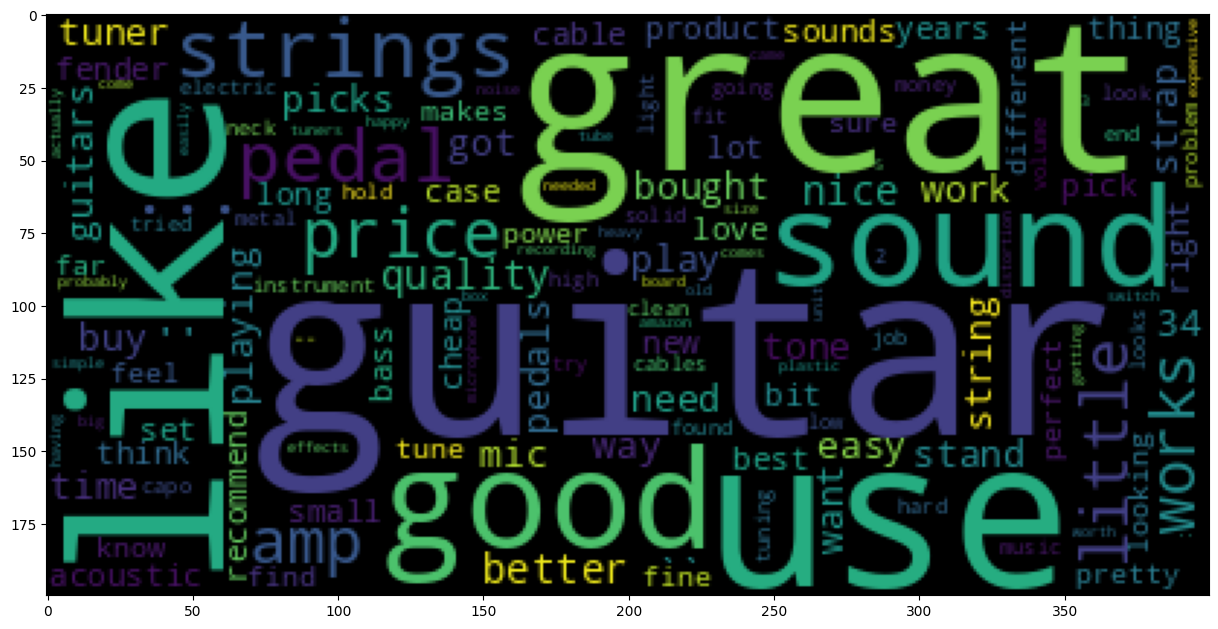

In [11]:
plt.figure(figsize=(15, 8))
word_cloud(counter_all)

Much better now but still not much informative, considering we care about **"what"** people are talking about.

In [12]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.4 MB/s eta 0:00:00


Why we don't we just filter in **useful** words?  POS - Pats of speech (Nouns)

In [13]:
#install english models of spacy

!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

review_sample = data['reviewText'].iloc[0]
review_sample

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,"

In [15]:
spacy_process_review = nlp(review_sample)
spacy_process_review

Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,

In [16]:
for c in spacy_process_review.noun_chunks:
  print(c, [t.pos_ for t in c])

it ['PRON']
exactly what ['ADV', 'PRON']
it ['PRON']
filters ['NOUN']
the pop sounds ['DET', 'NOUN', 'NOUN']
my recordings ['PRON', 'NOUN']
it ['PRON']
the lowest prices ['DET', 'ADJ', 'NOUN']
filters ['NOUN']
amazon ['PROPN']
it ['PRON']
they ['PRON']
their pricing ['PRON', 'NOUN']


In [17]:
for c in spacy_process_review.noun_chunks:
  new_nc = [t.text for t in c if t.pos_ in ['NOUN', 'PRON', 'ADJ', 'VERB']]
  if new_nc:
    print(new_nc)

['it']
['what']
['it']
['filters']
['pop', 'sounds']
['my', 'recordings']
['it']
['lowest', 'prices']
['filters']
['it']
['they']
['their', 'pricing']


In [25]:
# let create an function to automate these process

def get_pos_phrases(text):
  doc = nlp(text)
  required_nc = []
  for c in doc.noun_chunks:
    new_nc = [t.text for t in c if t.pos_ in ['NOUN', 'PROPN']]
    if new_nc:
      new_nc_next = ' '.join(new_nc)
      required_nc.append(new_nc_next)
  return ' '.join(required_nc)

In [26]:
data['pos_prases'] = data['reviewText'].apply(lambda x: get_pos_phrases(x))

In [27]:
data['pos_prases']

,pos_prases
0,filters pop sounds recordings prices filters a...
1,product bonus screens hint smell grape candy s...
2,job device breath popping sound voice reductio...
3,pops thing gooseneck screen position positioni...
4,pop filter studio filter vocals pops
...,...
10256,
10257,Nanoweb strings while price strings comments r...
10258,strings past Elixirs disconnect guitar condom ...
10259,Elixir DEVELOPED Taylor Guitars strings Rosewo...


In [33]:
def tokenize(text):
  tokens = [w for w in word_tokenize(text.lower())]
  return tokens

tokenized_clean_review = data['reviewText'].apply(remove_stopwords)
tokenized_clean_review

,reviewText
0,"[write, exactly, supposed, filters, pop, sound..."
1,"[product, exactly, affordable.i, realized, dou..."
2,"[primary, job, device, block, breath, produce,..."
3,"[nice, windscreen, protects, mxl, mic, prevent..."
4,"[pop, filter, great, looks, performs, like, st..."
...,...
10256,"[great, expected, thank]"
10257,"[thinking, trying, nanoweb, strings, bit, high..."
10258,"[tried, coated, strings, past, including, elix..."
10259,"[elixir, developed, taylor, guitars, ..., stri..."


In [34]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [50]:
vocablory = Dictionary(tokenized_clean_review)
vocablory[3201]

'jazz'

In [45]:
#doc2bow
bag_of_words_doc = [vocablory.doc2bow(text) for text in tokenized_clean_review]

In [54]:
lda = LdaModel(bag_of_words_doc, num_topics=10, id2word=vocablory)

In [55]:
lda.print_topics()

[(0,
  '0.019*"pedal" + 0.015*"like" + 0.014*"sound" + 0.012*"use" + 0.009*"tone" + 0.009*"good" + 0.009*"amp" + 0.008*"pedals" + 0.008*"great" + 0.007*"power"'),
 (1,
  '0.048*"strings" + 0.020*"guitar" + 0.016*"sound" + 0.014*"string" + 0.012*"great" + 0.011*"like" + 0.010*"tune" + 0.010*"good" + 0.010*"play" + 0.009*"tone"'),
 (2,
  '0.027*"34" + 0.017*"pedal" + 0.015*"works" + 0.012*"loop" + 0.010*"use" + 0.009*"stand" + 0.007*"great" + 0.007*"digital" + 0.006*"looper" + 0.006*"like"'),
 (3,
  '0.015*"great" + 0.013*"love" + 0.010*"good" + 0.010*"guitar" + 0.009*"little" + 0.007*"joyo" + 0.007*"use" + 0.005*"like" + 0.005*"curve" + 0.005*"picks"'),
 (4,
  '0.023*"..." + 0.014*"tuner" + 0.013*"great" + 0.011*"good" + 0.011*"guitar" + 0.010*"use" + 0.010*"tascam" + 0.008*"works" + 0.007*"quality" + 0.006*"easy"'),
 (5,
  '0.021*"sound" + 0.020*"amp" + 0.018*"34" + 0.011*"great" + 0.009*"like" + 0.008*"little" + 0.007*"looper" + 0.007*"guitar" + 0.006*"play" + 0.006*"tone"'),
 (6,
  '